In [1]:
!jt -t oceans16

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_df = pd.read_csv('total_casesAPRIL.csv')
deaths_df = pd.read_csv('death_cases_APRIL.csv')
recoveries_df = pd.read_csv('recovered_cases_APRIL.csv')

In [4]:
confirmed_df

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,4,8,11,15,20,33,44,52,...,1605,1743,1959,2089,2182,2283,2418,2533,2781,2925


In [5]:
deaths_df

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,0,0,0,0,0,1,1,2,...,41,41,42,42,44,44,47,49,49,49


In [6]:
recoveries_df

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,0,1,1,1,1,2,3,4,...,571,597,608,654,705,748,781,834,894,997


In [7]:
cols = confirmed_df.keys()
print(cols)

Index(['Unnamed: 0', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020',
       '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020',
       '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020',
       '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020',
       '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020',
       '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020',
       '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020',
       '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020',
       '05/10/2020', '05/11/2020', '05/12/2020', '05/13/2020', '05/14/2020',
       '05/15/2020', '05/16/2020', '05/17/2020', '05/18/2020', '05/19/2020',
       '05/20/2020', '05/21/2020', '05/22/2020', '05/23/2020', '05/24/2020',
       '05/25/2020', '05/26/2020', '05/27/2020', '05/28/2020', '05/29/2020',
       '05/30/2020', '05/31/2020'],
      dtype='object')


In [8]:
confirmed = confirmed_df.loc[0, cols[1]:cols[-1]]

In [9]:
deaths = deaths_df.loc[0, cols[1]:cols[-1]]

In [10]:
recoveries = recoveries_df.loc[0, cols[1]:cols[-1]]


In [11]:
dates = confirmed.keys()
state_cases=[]
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = []

In [12]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    state_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)


c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]
c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [13]:
print(confirmed_sum)
print(death_sum)
print(recovered_sum)
#print( mortality_rate)
print(recovery_rate)
print(total_active)

2925
49
997
[nan, 0.0, 0.125, 0.09090909090909091, 0.06666666666666667, 0.05, 0.06060606060606061, 0.06818181818181818, 0.07692307692307693, 0.07692307692307693, 0.0898876404494382, 0.08571428571428572, 0.08396946564885496, 0.0784313725490196, 0.07344632768361582, 0.07731958762886598, 0.09004739336492891, 0.08860759493670886, 0.10687022900763359, 0.12333333333333334, 0.14939024390243902, 0.1742857142857143, 0.2005420054200542, 0.2210796915167095, 0.2462686567164179, 0.27906976744186046, 0.3393665158371041, 0.3326488706365503, 0.37, 0.3706422018348624, 0.40530973451327434, 0.42614601018675724, 0.4509151414309484, 0.4771986970684039, 0.4930875576036866, 0.4918276374442793, 0.5108225108225108, 0.5191489361702127, 0.49604221635883905, 0.48614609571788414, 0.49764150943396224, 0.494199535962877, 0.4681081081081081, 0.470281543274244, 0.46605876393110435, 0.45454545454545453, 0.4542124542124542, 0.44376634699215345, 0.42536115569823435, 0.38924731182795697, 0.3803009575923393, 0.355763239875

In [14]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            #d.append(data[0])
            i=i+0
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
state_daily_increase = daily_increase(state_cases)


# deaths
state_daily_death = daily_increase(total_deaths)


# recoveries
state_daily_recovery = daily_increase(total_recovered)


In [15]:
print(state_daily_increase)
print(state_daily_death)
print(state_daily_recovery)

[4, 4, 3, 4, 5, 13, 11, 8, 13, 24, 16, 26, 22, 24, 17, 17, 26, 25, 38, 28, 22, 19, 20, 13, 28, 12, 45, 13, 45, 20, 24, 12, 13, 37, 22, 20, 12, 53, 36, 54, 14, 63, 34, 28, 69, 36, 55, 99, 149, 67, 143, 138, 216, 130, 93, 101, 135, 115, 248, 144]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 3, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 3, 1, 0, 0, 1, 0, 2, 0, 3, 2, 0, 0]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 4, 2, 7, 9, 12, 12, 13, 12, 13, 21, 30, 12, 23, 17, 27, 22, 20, 22, 28, 10, 23, 12, 10, 10, 36, 4, 7, 18, 9, 20, 16, 13, 21, 13, 13, 15, 26, 11, 46, 51, 43, 33, 53, 60, 103]


In [20]:
days_since_04_01 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
state_cases = np.array(state_cases).reshape(-1, 1)#-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis
total_deaths = np.array(total_deaths).reshape(-1, 1)#converts to a 1X1 matrix 
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [21]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [22]:
start = '04/01/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_04_01, state_cases, test_size=0.40, shuffle=False)

In [35]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

# polynomial regression
linear_model =LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
linear_model.score(poly_X_test_confirmed,y_test_confirmed)

MAE: 70.25195539378535
MSE: 10893.675851003078


0.9771204069847605

from sklearn.ensemble import RandomForestClassifier
svm_confirmed=RandomForestClassifier()
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
svm_confirmed.score(X_test_confirmed,y_test_confirmed)

In [100]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.09)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
svm_confirmed.score(X_test_confirmed,y_test_confirmed)

MAE: 181.68441998739402
MSE: 41899.28899820584


c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9120004401619329

In [97]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('# of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 04/01/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


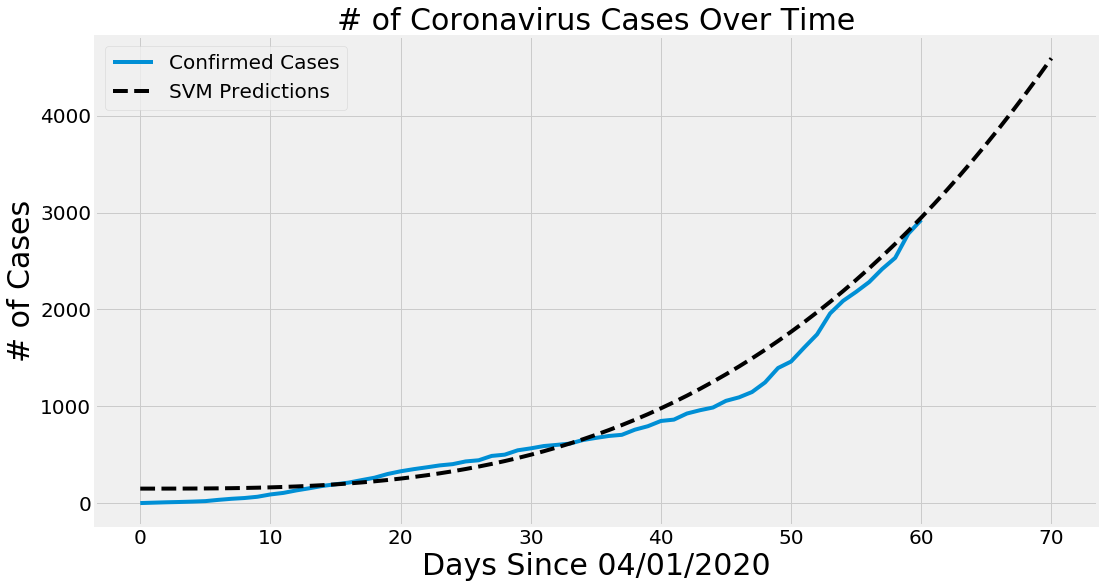

In [101]:
plot_predictions(adjusted_dates, state_cases, svm_pred, 'SVM Predictions', 'black')

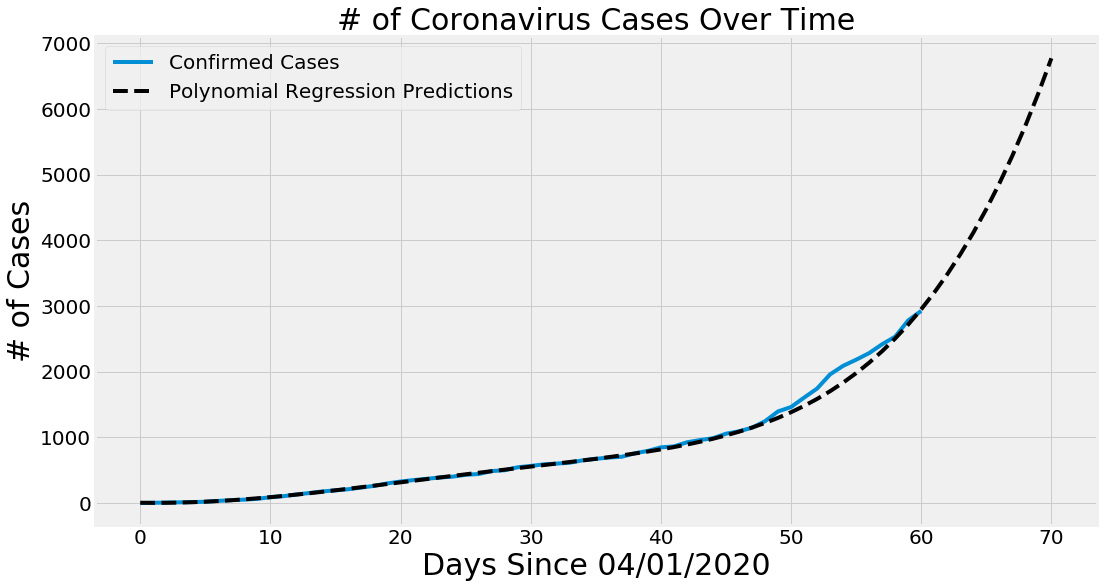

In [87]:
plot_predictions(adjusted_dates, state_cases, linear_pred, 'Polynomial Regression Predictions', 'black')

In [92]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases in Karnataka State': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases in Karnataka State
0,06/01/2020,3982.0
1,06/02/2020,4176.0
2,06/03/2020,4377.0
3,06/04/2020,4584.0
4,06/05/2020,4797.0
5,06/06/2020,5017.0
6,06/07/2020,5244.0
7,06/08/2020,5477.0
8,06/09/2020,5718.0
9,06/10/2020,5966.0


In [45]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases in Karnataka State': np.round(linear_pred[-10:])})
svm_df

,Date,Polynomial Predicted # of Confirmed Cases in Karnataka State
0,06/01/2020,3204.0
1,06/02/2020,3482.0
2,06/03/2020,3785.0
3,06/04/2020,4116.0
4,06/05/2020,4475.0
5,06/06/2020,4864.0
6,06/07/2020,5287.0
7,06/08/2020,5744.0
8,06/09/2020,6238.0
9,06/10/2020,6771.0
